Code to show a usecase of DDPG on a Pendulum environment

In [1]:
import gymnasium as gym
import os

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO, DDPG
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise

In [2]:
env = gym.make("Pendulum-v1")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.shape)
print("Action Space Sample", env.action_space.sample()) # Take a random action
print("Action Space High", env.action_space.high) # Get the highest action value
print("Action Space Low", env.action_space.low) # Get the lowest action value

_____OBSERVATION SPACE_____ 

Observation Space Shape (3,)
Sample observation [ 0.59675837 -0.06068799  3.3864245 ]

 _____ACTION SPACE_____ 

Action Space Shape (1,)
Action Space Sample [-1.7642672]
Action Space High [2.]
Action Space Low [-2.]


## Create the Model
- We are using an existing Deep RL library to set up the DDPG algorithm and model, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

In [3]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(1), sigma=float(0.5) * np.ones(1))

ddpg_model = DDPG(
    policy='MlpPolicy',
    env=env,
    learning_rate=1e-3,
    buffer_size=200000,
    learning_starts=1000,
    action_noise=action_noise,
    gamma=0.98,
    train_freq=(1,'episode'),
    verbose=1,
    seed=42)

ddpg_model.learn(total_timesteps=1e5, log_interval=10, progress_bar=True)
# Save the model
model_name = "ddpg-Pendulum-v1-ex2"
ddpg_model.save(model_name)

Output()

Using cpu device
Wrapping the env in a DummyVecEnv.


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.35e+03 |
| time/              |           |
|    episodes        | 10        |
|    fps             | 566       |
|    time_elapsed    | 3         |
|    total_timesteps | 2000      |
| train/             |           |
|    actor_loss      | 24        |
|    critic_loss     | 0.0518    |
|    learning_rate   | 0.001     |
|    n_updates       | 800       |
----------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -871     |
| time/              |          |
|    episodes        | 30       |
|    fps             | 301      |
|    time_elapsed    | 19       |
|    total_timesteps | 6000     |
| train/             |          |
|    actor_loss      | 65.6     |
|    critic_loss     | 0.567    |
|    learning_rate   | 0.001    |
|    n_updates       | 4800     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -766     |
| time/              |          |
|    episodes        | 40       |
|    fps             | 286      |
|    time_elapsed    | 27       |
|    total_timesteps | 8000     |
| train/             |          |
|    actor_loss      | 63.6     |
|    critic_loss     | 1.28     |
|    learning_rate   | 0.001    |
|    n_updates       | 6800     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -693     |
| time/              |          |
|    episodes        | 50       |
|    fps             | 277      |
|    time_elapsed    | 35       |
|    total_timesteps | 10000    |
| train/             |          |
|    actor_loss      | 56       |
|    critic_loss     | 1.36     |
|    learning_rate   | 0.001    |
|    n_updates       | 8800     |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -647     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 271      |
|    time_elapsed    | 44       |
|    total_timesteps | 12000    |
| train/             |          |
|    actor_loss      | 50.2     |
|    critic_loss     | 1.4      |
|    learning_rate   | 0.001    |
|    n_updates       | 10800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -592     |
| time/              |          |
|    episodes        | 70       |
|    fps             | 268      |
|    time_elapsed    | 52       |
|    total_timesteps | 14000    |
| train/             |          |
|    actor_loss      | 43.4     |
|    critic_loss     | 1.43     |
|    learning_rate   | 0.001    |
|    n_updates       | 12800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -563     |
| time/              |          |
|    episodes        | 80       |
|    fps             | 266      |
|    time_elapsed    | 59       |
|    total_timesteps | 16000    |
| train/             |          |
|    actor_loss      | 38.7     |
|    critic_loss     | 1.27     |
|    learning_rate   | 0.001    |
|    n_updates       | 14800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -532     |
| time/              |          |
|    episodes        | 90       |
|    fps             | 265      |
|    time_elapsed    | 67       |
|    total_timesteps | 18000    |
| train/             |          |
|    actor_loss      | 34.9     |
|    critic_loss     | 1.15     |
|    learning_rate   | 0.001    |
|    n_updates       | 16800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -505     |
| time/              |          |
|    episodes        | 100      |
|    fps             | 264      |
|    time_elapsed    | 75       |
|    total_timesteps | 20000    |
| train/             |          |
|    actor_loss      | 31.1     |
|    critic_loss     | 0.984    |
|    learning_rate   | 0.001    |
|    n_updates       | 18800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -394     |
| time/              |          |
|    episodes        | 110      |
|    fps             | 263      |
|    time_elapsed    | 83       |
|    total_timesteps | 22000    |
| train/             |          |
|    actor_loss      | 31       |
|    critic_loss     | 0.986    |
|    learning_rate   | 0.001    |
|    n_updates       | 20800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -340     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 262      |
|    time_elapsed    | 91       |
|    total_timesteps | 24000    |
| train/             |          |
|    actor_loss      | 30.4     |
|    critic_loss     | 0.874    |
|    learning_rate   | 0.001    |
|    n_updates       | 22800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -336     |
| time/              |          |
|    episodes        | 130      |
|    fps             | 262      |
|    time_elapsed    | 99       |
|    total_timesteps | 26000    |
| train/             |          |
|    actor_loss      | 30       |
|    critic_loss     | 0.925    |
|    learning_rate   | 0.001    |
|    n_updates       | 24800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -320     |
| time/              |          |
|    episodes        | 140      |
|    fps             | 261      |
|    time_elapsed    | 107      |
|    total_timesteps | 28000    |
| train/             |          |
|    actor_loss      | 29.6     |
|    critic_loss     | 0.969    |
|    learning_rate   | 0.001    |
|    n_updates       | 26800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -315     |
| time/              |          |
|    episodes        | 150      |
|    fps             | 260      |
|    time_elapsed    | 115      |
|    total_timesteps | 30000    |
| train/             |          |
|    actor_loss      | 29.9     |
|    critic_loss     | 0.916    |
|    learning_rate   | 0.001    |
|    n_updates       | 28800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -293     |
| time/              |          |
|    episodes        | 160      |
|    fps             | 260      |
|    time_elapsed    | 122      |
|    total_timesteps | 32000    |
| train/             |          |
|    actor_loss      | 28.5     |
|    critic_loss     | 1.05     |
|    learning_rate   | 0.001    |
|    n_updates       | 30800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -300     |
| time/              |          |
|    episodes        | 170      |
|    fps             | 259      |
|    time_elapsed    | 131      |
|    total_timesteps | 34000    |
| train/             |          |
|    actor_loss      | 27.6     |
|    critic_loss     | 0.984    |
|    learning_rate   | 0.001    |
|    n_updates       | 32800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -282     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 258      |
|    time_elapsed    | 139      |
|    total_timesteps | 36000    |
| train/             |          |
|    actor_loss      | 26.8     |
|    critic_loss     | 1.11     |
|    learning_rate   | 0.001    |
|    n_updates       | 34800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -284     |
| time/              |          |
|    episodes        | 190      |
|    fps             | 257      |
|    time_elapsed    | 147      |
|    total_timesteps | 38000    |
| train/             |          |
|    actor_loss      | 26.1     |
|    critic_loss     | 0.932    |
|    learning_rate   | 0.001    |
|    n_updates       | 36800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -279     |
| time/              |          |
|    episodes        | 200      |
|    fps             | 256      |
|    time_elapsed    | 155      |
|    total_timesteps | 40000    |
| train/             |          |
|    actor_loss      | 25.8     |
|    critic_loss     | 0.971    |
|    learning_rate   | 0.001    |
|    n_updates       | 38800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -289     |
| time/              |          |
|    episodes        | 210      |
|    fps             | 256      |
|    time_elapsed    | 163      |
|    total_timesteps | 42000    |
| train/             |          |
|    actor_loss      | 25.6     |
|    critic_loss     | 0.975    |
|    learning_rate   | 0.001    |
|    n_updates       | 40800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -295     |
| time/              |          |
|    episodes        | 220      |
|    fps             | 256      |
|    time_elapsed    | 171      |
|    total_timesteps | 44000    |
| train/             |          |
|    actor_loss      | 25.6     |
|    critic_loss     | 1        |
|    learning_rate   | 0.001    |
|    n_updates       | 42800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -291     |
| time/              |          |
|    episodes        | 230      |
|    fps             | 256      |
|    time_elapsed    | 179      |
|    total_timesteps | 46000    |
| train/             |          |
|    actor_loss      | 25.7     |
|    critic_loss     | 0.92     |
|    learning_rate   | 0.001    |
|    n_updates       | 44800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -286     |
| time/              |          |
|    episodes        | 240      |
|    fps             | 256      |
|    time_elapsed    | 187      |
|    total_timesteps | 48000    |
| train/             |          |
|    actor_loss      | 26.2     |
|    critic_loss     | 0.674    |
|    learning_rate   | 0.001    |
|    n_updates       | 46800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -264     |
| time/              |          |
|    episodes        | 250      |
|    fps             | 256      |
|    time_elapsed    | 194      |
|    total_timesteps | 50000    |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 0.86     |
|    learning_rate   | 0.001    |
|    n_updates       | 48800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -277     |
| time/              |          |
|    episodes        | 260      |
|    fps             | 256      |
|    time_elapsed    | 202      |
|    total_timesteps | 52000    |
| train/             |          |
|    actor_loss      | 25.4     |
|    critic_loss     | 0.767    |
|    learning_rate   | 0.001    |
|    n_updates       | 50800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -273     |
| time/              |          |
|    episodes        | 270      |
|    fps             | 255      |
|    time_elapsed    | 211      |
|    total_timesteps | 54000    |
| train/             |          |
|    actor_loss      | 25.5     |
|    critic_loss     | 0.64     |
|    learning_rate   | 0.001    |
|    n_updates       | 52800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -283     |
| time/              |          |
|    episodes        | 280      |
|    fps             | 255      |
|    time_elapsed    | 219      |
|    total_timesteps | 56000    |
| train/             |          |
|    actor_loss      | 25.3     |
|    critic_loss     | 0.772    |
|    learning_rate   | 0.001    |
|    n_updates       | 54800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -280     |
| time/              |          |
|    episodes        | 290      |
|    fps             | 255      |
|    time_elapsed    | 226      |
|    total_timesteps | 58000    |
| train/             |          |
|    actor_loss      | 25.5     |
|    critic_loss     | 0.754    |
|    learning_rate   | 0.001    |
|    n_updates       | 56800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -280     |
| time/              |          |
|    episodes        | 300      |
|    fps             | 255      |
|    time_elapsed    | 235      |
|    total_timesteps | 60000    |
| train/             |          |
|    actor_loss      | 25.3     |
|    critic_loss     | 0.856    |
|    learning_rate   | 0.001    |
|    n_updates       | 58800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -279     |
| time/              |          |
|    episodes        | 310      |
|    fps             | 255      |
|    time_elapsed    | 242      |
|    total_timesteps | 62000    |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 0.78     |
|    learning_rate   | 0.001    |
|    n_updates       | 60800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -280     |
| time/              |          |
|    episodes        | 320      |
|    fps             | 255      |
|    time_elapsed    | 250      |
|    total_timesteps | 64000    |
| train/             |          |
|    actor_loss      | 25.5     |
|    critic_loss     | 0.868    |
|    learning_rate   | 0.001    |
|    n_updates       | 62800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -269     |
| time/              |          |
|    episodes        | 330      |
|    fps             | 255      |
|    time_elapsed    | 258      |
|    total_timesteps | 66000    |
| train/             |          |
|    actor_loss      | 25.5     |
|    critic_loss     | 0.846    |
|    learning_rate   | 0.001    |
|    n_updates       | 64800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -274     |
| time/              |          |
|    episodes        | 340      |
|    fps             | 255      |
|    time_elapsed    | 265      |
|    total_timesteps | 68000    |
| train/             |          |
|    actor_loss      | 25.1     |
|    critic_loss     | 0.918    |
|    learning_rate   | 0.001    |
|    n_updates       | 66800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -283     |
| time/              |          |
|    episodes        | 350      |
|    fps             | 255      |
|    time_elapsed    | 273      |
|    total_timesteps | 70000    |
| train/             |          |
|    actor_loss      | 24.8     |
|    critic_loss     | 0.902    |
|    learning_rate   | 0.001    |
|    n_updates       | 68800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -268     |
| time/              |          |
|    episodes        | 360      |
|    fps             | 256      |
|    time_elapsed    | 280      |
|    total_timesteps | 72000    |
| train/             |          |
|    actor_loss      | 25.2     |
|    critic_loss     | 0.682    |
|    learning_rate   | 0.001    |
|    n_updates       | 70800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -269     |
| time/              |          |
|    episodes        | 370      |
|    fps             | 256      |
|    time_elapsed    | 288      |
|    total_timesteps | 74000    |
| train/             |          |
|    actor_loss      | 24       |
|    critic_loss     | 0.874    |
|    learning_rate   | 0.001    |
|    n_updates       | 72800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -265     |
| time/              |          |
|    episodes        | 380      |
|    fps             | 256      |
|    time_elapsed    | 296      |
|    total_timesteps | 76000    |
| train/             |          |
|    actor_loss      | 24.6     |
|    critic_loss     | 0.608    |
|    learning_rate   | 0.001    |
|    n_updates       | 74800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -265     |
| time/              |          |
|    episodes        | 390      |
|    fps             | 256      |
|    time_elapsed    | 303      |
|    total_timesteps | 78000    |
| train/             |          |
|    actor_loss      | 23.7     |
|    critic_loss     | 0.711    |
|    learning_rate   | 0.001    |
|    n_updates       | 76800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -281     |
| time/              |          |
|    episodes        | 400      |
|    fps             | 257      |
|    time_elapsed    | 311      |
|    total_timesteps | 80000    |
| train/             |          |
|    actor_loss      | 23.5     |
|    critic_loss     | 0.692    |
|    learning_rate   | 0.001    |
|    n_updates       | 78800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -272     |
| time/              |          |
|    episodes        | 410      |
|    fps             | 257      |
|    time_elapsed    | 318      |
|    total_timesteps | 82000    |
| train/             |          |
|    actor_loss      | 24       |
|    critic_loss     | 0.87     |
|    learning_rate   | 0.001    |
|    n_updates       | 80800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -258     |
| time/              |          |
|    episodes        | 420      |
|    fps             | 257      |
|    time_elapsed    | 326      |
|    total_timesteps | 84000    |
| train/             |          |
|    actor_loss      | 23.1     |
|    critic_loss     | 0.915    |
|    learning_rate   | 0.001    |
|    n_updates       | 82800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -268     |
| time/              |          |
|    episodes        | 430      |
|    fps             | 257      |
|    time_elapsed    | 334      |
|    total_timesteps | 86000    |
| train/             |          |
|    actor_loss      | 23.5     |
|    critic_loss     | 0.999    |
|    learning_rate   | 0.001    |
|    n_updates       | 84800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -277     |
| time/              |          |
|    episodes        | 440      |
|    fps             | 257      |
|    time_elapsed    | 342      |
|    total_timesteps | 88000    |
| train/             |          |
|    actor_loss      | 23.3     |
|    critic_loss     | 0.677    |
|    learning_rate   | 0.001    |
|    n_updates       | 86800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -296     |
| time/              |          |
|    episodes        | 450      |
|    fps             | 257      |
|    time_elapsed    | 349      |
|    total_timesteps | 90000    |
| train/             |          |
|    actor_loss      | 23.8     |
|    critic_loss     | 0.668    |
|    learning_rate   | 0.001    |
|    n_updates       | 88800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -321     |
| time/              |          |
|    episodes        | 460      |
|    fps             | 257      |
|    time_elapsed    | 357      |
|    total_timesteps | 92000    |
| train/             |          |
|    actor_loss      | 23       |
|    critic_loss     | 0.621    |
|    learning_rate   | 0.001    |
|    n_updates       | 90800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -330     |
| time/              |          |
|    episodes        | 470      |
|    fps             | 257      |
|    time_elapsed    | 364      |
|    total_timesteps | 94000    |
| train/             |          |
|    actor_loss      | 22.7     |
|    critic_loss     | 0.683    |
|    learning_rate   | 0.001    |
|    n_updates       | 92800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -328     |
| time/              |          |
|    episodes        | 480      |
|    fps             | 257      |
|    time_elapsed    | 372      |
|    total_timesteps | 96000    |
| train/             |          |
|    actor_loss      | 23.5     |
|    critic_loss     | 0.95     |
|    learning_rate   | 0.001    |
|    n_updates       | 94800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -328     |
| time/              |          |
|    episodes        | 490      |
|    fps             | 257      |
|    time_elapsed    | 380      |
|    total_timesteps | 98000    |
| train/             |          |
|    actor_loss      | 23       |
|    critic_loss     | 0.723    |
|    learning_rate   | 0.001    |
|    n_updates       | 96800    |
---------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -347     |
| time/              |          |
|    episodes        | 500      |
|    fps             | 257      |
|    time_elapsed    | 387      |
|    total_timesteps | 100000   |
| train/             |          |
|    actor_loss      | 24.1     |
|    critic_loss     | 0.557    |
|    learning_rate   | 0.001    |
|    n_updates       | 98800    |
---------------------------------


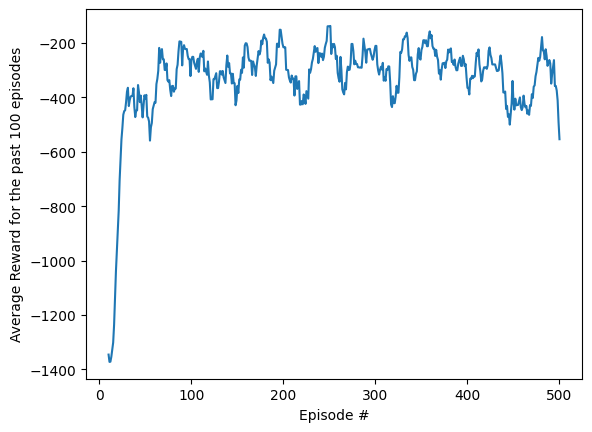

In [4]:
episode_rew_ddpg = env.get_episode_rewards()
episode_rew_ddpg_ma = (np.convolve(episode_rew_ddpg, np.ones(10), "valid") / 10)
plt.plot(np.arange(10, len(episode_rew_ddpg)+1), episode_rew_ddpg_ma)
plt.ylabel('Average Reward for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

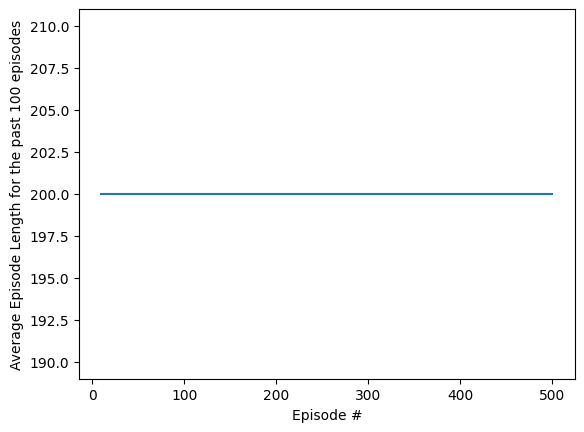

In [5]:
episode_len_ddpg = env.get_episode_lengths()
episode_len_ddpg_ma = (np.convolve(episode_len_ddpg, np.ones(10), "valid") / 10)
plt.plot(np.arange(10, len(episode_len_ddpg)+1), episode_len_ddpg_ma)
plt.ylabel('Average Episode Length for the past 100 episodes')
plt.xlabel('Episode #')
plt.show()

In [6]:
# Evaluate the final agent
eval_env = Monitor(gym.make("Pendulum-v1"))
mean_reward, std_reward = evaluate_policy(ddpg_model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Training steps: 100,000 || mean_reward={mean_reward:.2f} +/- {std_reward}")

Training steps: 100,000 || mean_reward=-147.32 +/- 69.73641176762966


In [7]:
import glob
import io
import base64
from IPython import display
from IPython.display import HTML
from gym.wrappers.monitoring import video_recorder
import torch

def show_video(video_name):
    mp4list = glob.glob('video/ex2/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/ex2/{}.mp4'.format(video_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(agent, env_name, video_name):
    env = gym.make(env_name, render_mode='rgb_array')
    vid = video_recorder.VideoRecorder(env, path="video/ex2/{}.mp4".format(video_name))
    state, _ = env.reset()
    done, truncated = False, False
    reward_list = []
    while not done and not truncated:
        frame = env.render()

        vid.capture_frame()
        # import pdb; pdb.set_trace()
        action = agent.predict(state)

        state, reward, done, truncated, _ = env.step(action[0])
        reward_list.append(reward)
    vid.close()
    env.close()
    print(np.array(reward_list).sum())

In [8]:
!mkdir video
!mkdir video/ex2

mkdir: video: File exists
mkdir: video/ex2: File exists


In [9]:
saved_model = DDPG.load("./ddpg-Pendulum-v1-ex2.zip")

In [10]:
show_video_of_model(saved_model, "Pendulum-v1", 'DDPG')
show_video('DDPG')

/Users/keithwang/miniforge3_arm64/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


-229.92211294511316
